### Кластеризация обучающих данных

In [1]:
import pandas as pd
import itertools as itert
import numpy as np

In [2]:
#Функция проверки наличия/отсутствия элемента в заданном списке2 для элементов списка1
def for_each_if_in(list1, list2, reverse = False):
    list3 = []
    for i in list1:
        list3.append((i in list2) != reverse)
    return list3

In [3]:
data = pd.read_csv('Learn_sample.txt', sep='\t')

In [4]:
# Создание рабочей копии данных
data_di = data[:]

In [5]:
# Удаление строк, в которых встречаются не только динуклеотиды(SNP  отличные от замены)
# Для возможности применить OHE
# таких строк всего 700 из 250 000
l1 = list(map(''.join, list(itert.product('ATGC', repeat=2))))
for i in range(4,104):
    data_di = data_di[for_each_if_in(data_di['Unnamed: ' + str(i)], l1)]

In [6]:
data_di.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103
0,rs200345880,10,82691,NaN,AA,GA,AA,AA,AA,AG,...,GG,GG,GG,GG,AA,GG,GA,GG,GG,GA
1,rs10751931,10,95949,NaN,TC,TC,TC,TC,TT,TT,...,TT,TT,TT,TT,CT,TT,TT,TT,TT,TT
2,rs4266997,10,96434,NaN,CT,CT,CT,CT,CC,CC,...,CC,CC,CC,CC,TC,CC,CT,CC,CC,CT
3,rs4881370,10,109082,NaN,CT,CC,CT,CT,CC,CC,...,CC,CC,CC,CC,TC,CC,CT,CC,CC,CT
4,rs4242802,10,133998,NaN,GC,GG,GC,GC,GG,GG,...,GG,GG,GG,GG,CG,GG,GC,GG,GG,GC


In [7]:
# Удаление описательных столбцов
data_di_nuc_only = data_di.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3'], axis=1)

In [8]:
# Переход к таблице объекты-признаки
data_di_nuc_only = data_di_nuc_only.T

In [9]:
# Создание массива индексов объектов
human = []
for i in range(1,101):
    human.append('human ' + str(i))

In [10]:
data_di_nuc_only.index = human
data_di_nuc_only.head()

,0,1,2,3,4,5,6,7,8,9,...,249990,249991,249992,249993,249994,249995,249996,249997,249998,249999
human 1,AA,TC,CT,CT,GC,GA,TA,GA,AA,AG,...,CT,TA,CT,TT,TT,AA,CC,GG,GG,TC
human 2,GA,TC,CT,CC,GG,GG,TT,GG,AA,AA,...,CC,TT,CC,AT,CT,AA,TC,GG,GG,CC
human 3,AA,TC,CT,CT,GC,GA,TA,GA,CA,AA,...,TC,AA,TC,TA,TC,AA,CC,GG,GG,CC
human 4,AA,TC,CT,CT,GC,GA,TA,GA,AA,AG,...,CC,TT,CC,AT,CC,TA,CC,GG,GA,CT
human 5,AA,TT,CC,CC,GG,GG,TT,GG,AA,AG,...,CT,TA,CT,TA,TC,AA,CC,GG,GG,CC


In [11]:
# Определение функции one-hot-encode для метода DataFrame.apply
def OHE(row, pos_vals = l1):
    row_upd = []
    for i in row:
        upd = [0] * 16
        for j in range(16):
            if i == pos_vals[j]:
                upd[j] = 1
                break
        row_upd.extend(upd)
    return(row_upd) 

In [12]:
# Кодирование прознаков
data_di_nuc_only_OHE = data_di_nuc_only.apply(OHE, axis=1, result_type='expand')

In [13]:
data_di_nuc_only_OHE.head()

,0,1,2,3,4,5,6,7,8,9,...,3989622,3989623,3989624,3989625,3989626,3989627,3989628,3989629,3989630,3989631
human 1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
human 2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
human 3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
human 4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
human 5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [14]:
from sklearn.cluster import KMeans

In [15]:
# Кластеризация данных для определения положительного и отрицательного классов
kmeans = KMeans(n_clusters=2).fit(data_di_nuc_only_OHE)

In [16]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

In [18]:
# Применение PCA для визуализации результатов кластеризации
pca = PCA(n_components=2)
X = np.array(data_di_nuc_only_OHE)
X_embedded = pca.fit_transform(X)

In [19]:
# Добавление раскраски  к кординатам
df = pd.DataFrame(X_embedded)
dfkm = pd.DataFrame(kmeans.labels_)
df1 = pd.concat([df, dfkm], axis = 1)
df1.columns = ['x', 'y', 'km']

<Figure size 3312x3312 with 0 Axes>

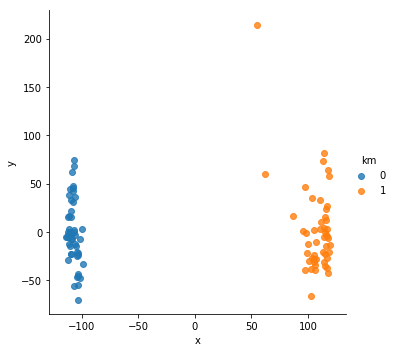

In [43]:
# Визуализация
%matplotlib inline
plt.figure(figsize = (46,46))
facet = sns.lmplot(data=df1, x='x', y='y', hue='km', 
                   fit_reg=False, legend=True, legend_out=True)


Как можно увидеть данные хорошо разделились, а значит эти результаты можно применить в качестве разметки классов.

In [21]:
dfkm.index = data_di_nuc_only.index
dfkm.columns = ['class']

### Обучение модели МО

In [22]:
# Добавление к данным разметки по классам
data_di_nuc_only_OHE_marked = pd.concat([data_di_nuc_only_OHE, dfkm], axis = 1)

In [23]:
data_di_nuc_only_OHE_marked.head()

,0,1,2,3,4,5,6,7,8,9,...,3989623,3989624,3989625,3989626,3989627,3989628,3989629,3989630,3989631,class
human 1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
human 2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
human 3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
human 4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
human 5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

In [25]:
# Разбиение данных на учебную и проверочную выборки
X = np.array(data_di_nuc_only_OHE_marked)[:,:-1]
y = np.array(data_di_nuc_only_OHE_marked)[:,-1]
y = y.reshape((len(y), 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44)

In [45]:
model = RandomForestClassifier(n_estimators=10)
model.fit(X_train, y_train)

C:\Users\Glados\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

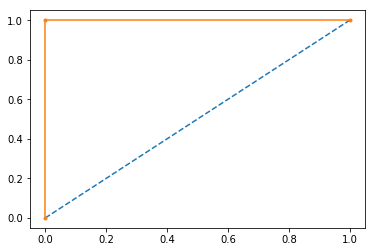

AUC-ROC (test) =  1.0


In [46]:
# Построение ROC-кривой и вычисление AUC-ROC
a1 = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, a1)
plt.plot([0, 1], [0, 1], linestyle='--')# ожидаемый результат случайного предсказания
plt.plot(fpr, tpr, marker='.')
plt.show()
print ("AUC-ROC (test) = ", roc_auc_score(y_test, a1))

### Класификация тестовых данных

In [28]:
# Повторение препроцесинга для тестовых данных
data1 = pd.read_csv('Test_sample.txt', sep='\t')
data_di2 = data1[:]

In [29]:
# Определение отброшенных признаков для первой модели
disj = list(set(data['Unnamed: 0']) - set(data_di['Unnamed: 0']))

In [30]:
# Удаление отброшенных признаков для тестовых данных
data_di2 = data_di2[for_each_if_in(data_di2['Unnamed: 0'], disj, reverse=True)]
data_di2.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103
0,rs200345880,10,82691,NaN,AA,AA,GA,AA,GA,AA,...,GA,GG,GG,GG,GG,GA,GG,GG,GG,GG
1,rs10751931,10,95949,NaN,TT,TC,TT,TT,TC,CC,...,TT,TT,TT,TT,TT,TC,TT,TT,TT,TT
2,rs4266997,10,96434,NaN,CC,CT,CC,CC,CT,TT,...,CT,CC,CC,CC,CC,CT,CC,CC,CC,CC
3,rs4881370,10,109082,NaN,CC,CT,CC,CC,CT,TT,...,CT,CC,CC,CC,CC,CT,CC,CC,CC,CC
4,rs4242802,10,133998,NaN,GG,GC,GG,GG,GC,CC,...,GC,GG,GG,GG,GG,GC,GG,GG,GG,GG


In [31]:
# Удаление описания
data_di2_nuc_only = data_di2.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3'], axis=1)

In [32]:
data_di2_nuc_only = data_di2_nuc_only.T

In [33]:
data_di2_nuc_only.index = human
data_di2_nuc_only.head()

,0,1,2,3,4,5,6,7,8,9,...,249990,249991,249992,249993,249994,249995,249996,249997,249998,249999
human 1,AA,TT,CC,CC,GG,GG,TT,GG,AA,AA,...,TT,AA,TT,TA,CC,AT,CC,GG,GG,CC
human 2,AA,TC,CT,CT,GC,GA,TA,GA,AA,GG,...,TC,AT,TC,TT,CT,AA,TC,GG,GG,TT
human 3,GA,TT,CC,CC,GG,GG,TA,GG,AA,AA,...,CC,TT,CC,TT,TT,AA,TC,AG,AG,TC
human 4,AA,TT,CC,CC,GG,GG,TT,GG,AA,AA,...,CC,TT,CC,TT,CT,AA,TC,AG,AG,TT
human 5,GA,TC,CT,CT,GC,GA,TA,GA,AA,AA,...,CC,TT,CC,TT,CT,TA,TT,AG,GA,TT


In [34]:
# Кодирование прознаков
data_di2_nuc_only_OHE = data_di2_nuc_only.apply(OHE, axis=1, result_type='expand')

In [35]:
data_di2_nuc_only_OHE.head()

,0,1,2,3,4,5,6,7,8,9,...,3989622,3989623,3989624,3989625,3989626,3989627,3989628,3989629,3989630,3989631
human 1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
human 2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
human 3,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
human 4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
human 5,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
X1 = np.array(data_di2_nuc_only_OHE)

In [47]:
#  Предсказание результатов
a2 = model.predict(X1)

In [51]:
# Проведение кластеризации для первичной проверки
kmeans2 = KMeans(n_clusters=2).fit(data_di2_nuc_only_OHE)

In [57]:
y1 = kmeans2.labels_

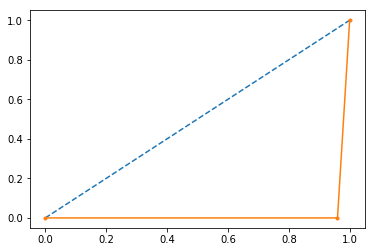

AUC-ROC (test) =  0.020000000000000018


In [58]:
# Визуализация результата
fpr, tpr, thresholds = roc_curve(y1, a2)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()
print ("AUC-ROC (test) = ", roc_auc_score(y1, a2))

Так как кластеризации проходили независимо классы могли поменяться местами

In [59]:
# Обратная замена классов
y2 = (np.array(y1) - np.ones(len(y1))) * -1

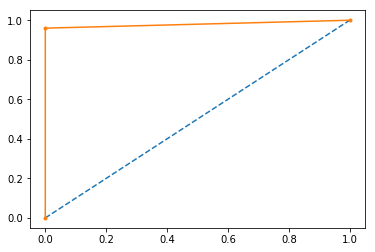

AUC-ROC (test) =  0.98


In [60]:
# Повторная визуализация
fpr, tpr, thresholds = roc_curve(y2, a2)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()
print ("AUC-ROC (test) = ", roc_auc_score(y2, a2))